# **Install Necessary Dependencies**

In [1]:
pip install rouge

Note: you may need to restart the kernel to use updated packages.


# **Import Necessary Libraries**

In [33]:
import warnings
warnings.filterwarnings('ignore')

# **Define File Paths and Read Files**

In [4]:
# # File paths organized into a dictionary for clarity
# files = {
#     "bible_train_en": "/kaggle/input/question_1_dataset/pytorch/default/1/bible_train.en",
#     "bible_train_ur": "/kaggle/input/question_1_dataset/pytorch/default/1/bible_train.ur",
#     "bible_test_en": "/kaggle/input/question_1_dataset/pytorch/default/1/bible_test.en",
#     "bible_test_ur": "/kaggle/input/question_1_dataset/pytorch/default/1/bible_test.ur",
#     'bible_dev_en' : "/kaggle/input/question_1_dataset/pytorch/default/1/bible_dev.en",
#     'bible_dev_ur' : "/kaggle/input/question_1_dataset/pytorch/default/1/bible_dev.ur",
#     "quran_train_en": "/kaggle/input/question_1_dataset/pytorch/default/1/quran_train.en",
#     "quran_train_ur": "/kaggle/input/question_1_dataset/pytorch/default/1/quran_train.ur",
#     "quran_test_en": "/kaggle/input/question_1_dataset/pytorch/default/1/quran_test.en",
#     "quran_test_ur": "/kaggle/input/question_1_dataset/pytorch/default/1/quran_test.ur",
#     'quran_dev_en' : "/kaggle/input/question_1_dataset/pytorch/default/1/quran_dev.en",
#     'quran_dev_ur' : "/kaggle/input/question_1_dataset/pytorch/default/1/quran_dev.ur"
# }

# def display_file_details(file_path, display_lines=1):
#     try:
#         with open(file_path, 'r', encoding='utf-8') as file:
#             lines = file.readlines()
#             print(f"Total Lines: {len(lines)}")
#     except FileNotFoundError:
#         print(f"Error: File not found - {file_path}")
#     except Exception as e:
#         print(f"Error reading file {file_path}: {e}")
# # Loop through all files and display their details
# for name, path in files.items():
#     print(f"Processing {name}:")
#     display_file_details(path)


# **Preprocessing and Tokenization**

In [5]:
import re
from tokenizers import Tokenizer, models, pre_tokenizers, decoders, trainers

# Define cleaning function
def clean_text(text):
    text = re.sub(r"[^\u0600-\u06FFa-zA-Z\s]", "", text)  # Retain only Urdu, English, and spaces
    text = re.sub(r"\s+", " ", text).strip()  # Normalize extra whitespace
    return text

# Tokenizer training function
def train_combined_tokenizer(file_paths, vocab_size=8000):
    tokenizer = Tokenizer(models.BPE())  # Use Byte-Pair Encoding (BPE)
    tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()  # Tokenize on whitespace
    trainer = trainers.BpeTrainer(
        vocab_size=vocab_size,
        special_tokens=["<pad>", "<s>", "</s>", "<unk>"]  # Add special tokens
    )
    
    # Train tokenizer
    tokenizer.train(files=file_paths, trainer=trainer)
    return tokenizer

# Preprocess and tokenize function
def preprocess_and_tokenize(file_path, tokenizer, num_preview=5):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            lines = file.readlines()
    except FileNotFoundError:
        print(f"Error: File not found - {file_path}")
        return [], []
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return [], []
    
    # Clean lines
    cleaned_lines = [clean_text(line) for line in lines]
    
    # Tokenize cleaned lines
    tokenized_lines = [tokenizer.encode(line).tokens for line in cleaned_lines]
    
    # Preview results
    print(f"File: {file_path}")
    print(f"First {num_preview} cleaned lines: {cleaned_lines[:num_preview]}")
    print(f"First {num_preview} tokenized lines: {tokenized_lines[:num_preview]}\n")
    
    return cleaned_lines, tokenized_lines

# File paths for training and tokenization
file_paths = [
    "/kaggle/input/question_1_dataset/pytorch/default/1/bible_train.en", 
    "/kaggle/input/question_1_dataset/pytorch/default/1/bible_train.ur",
    "/kaggle/input/question_1_dataset/pytorch/default/1/bible_test.en", 
    "/kaggle/input/question_1_dataset/pytorch/default/1/bible_test.ur",
    '/kaggle/input/question_1_dataset/pytorch/default/1/bible_dev.en', 
    '/kaggle/input/question_1_dataset/pytorch/default/1/bible_dev.ur',
    "/kaggle/input/question_1_dataset/pytorch/default/1/quran_train.en", 
    "/kaggle/input/question_1_dataset/pytorch/default/1/quran_train.ur",
    "/kaggle/input/question_1_dataset/pytorch/default/1/quran_test.en", 
    "/kaggle/input/question_1_dataset/pytorch/default/1/quran_test.ur",
    "/kaggle/input/question_1_dataset/pytorch/default/1/quran_dev.en", 
    "/kaggle/input/question_1_dataset/pytorch/default/1/quran_dev.ur"
]

combined_tokenizer = train_combined_tokenizer(file_paths, vocab_size=8000)

# Preprocess and tokenize each file
for file_path in file_paths:
    preprocess_and_tokenize(file_path, combined_tokenizer, num_preview=1)





File: /kaggle/input/question_1_dataset/pytorch/default/1/bible_train.en
First 1 cleaned lines: ['The book of the generation of Jesus Christ the son of David the son of Abraham']
First 1 tokenized lines: [['The', 'book', 'of', 'the', 'generation', 'of', 'Jesus', 'Christ', 'the', 'son', 'of', 'David', 'the', 'son', 'of', 'Abraham']]

File: /kaggle/input/question_1_dataset/pytorch/default/1/bible_train.ur
First 1 cleaned lines: ['یسوع مسیح ابن داود ابن ابرہام کا نسب نامہ']
First 1 tokenized lines: [['یسوع', 'مسیح', 'ابن', 'داود', 'ابن', 'ابرہام', 'کا', 'ن', 'سب', 'نام', 'ہ']]

File: /kaggle/input/question_1_dataset/pytorch/default/1/bible_test.en
First 1 cleaned lines: ['And to them it was given that they should not kill them but that they should be tormented five months and their torment was as the torment of a scorpion when he striketh a man']
First 1 tokenized lines: [['And', 'to', 'them', 'it', 'was', 'given', 'that', 'they', 'should', 'not', 'kill', 'them', 'but', 'that', 'they', 

# Transformer

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.nn.functional import log_softmax
import math
from typing import Optional

# Positional Encoding
class PositionalEncoding(nn.Module):
    def __init__(self, embed_size, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, embed_size)
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, embed_size, 2).float() * -(math.log(10000.0) / embed_size))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.pe = pe.unsqueeze(0)

    def forward(self, x):
        x = x + self.pe[:, :x.size(1)].to(x.device)
        return x

# Multi-Head Attention
class MultiHeadAttention(nn.Module):
    def __init__(self, embed_size, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert embed_size % num_heads == 0, "Embedding size must be divisible by number of heads"
        self.head_dim = embed_size // num_heads
        self.num_heads = num_heads
        self.embed_size = embed_size

        self.q_linear = nn.Linear(embed_size, embed_size)
        self.k_linear = nn.Linear(embed_size, embed_size)
        self.v_linear = nn.Linear(embed_size, embed_size)
        self.fc_out = nn.Linear(embed_size, embed_size)
    
    def forward(self, query, key, value, mask=None):
        N = query.shape[0]
        Q = self.q_linear(query)
        K = self.k_linear(key)
        V = self.v_linear(value)
        
        Q = Q.reshape(N, -1, self.num_heads, self.head_dim).permute(0, 2, 1, 3)
        K = K.reshape(N, -1, self.num_heads, self.head_dim).permute(0, 2, 1, 3)
        V = V.reshape(N, -1, self.num_heads, self.head_dim).permute(0, 2, 1, 3)
        
        energy = torch.matmul(Q, K.transpose(-1, -2)) / math.sqrt(self.head_dim)
        if mask is not None:
            energy = energy.masked_fill(mask == 0, float("-1e20"))
        attention = torch.softmax(energy, dim=-1)
        out = torch.matmul(attention, V).permute(0, 2, 1, 3).reshape(N, -1, self.embed_size)
        return self.fc_out(out)

# Feed Forward
class FeedForward(nn.Module):
    def __init__(self, embed_size, ff_hidden):
        super(FeedForward, self).__init__()
        self.fc1 = nn.Linear(embed_size, ff_hidden)
        self.fc2 = nn.Linear(ff_hidden, embed_size)
    
    def forward(self, x):
        return self.fc2(torch.relu(self.fc1(x)))

# Transformer Block
class TransformerBlock(nn.Module):
    def __init__(self, embed_size, num_heads, ff_hidden, dropout):
        super(TransformerBlock, self).__init__()
        self.attention = MultiHeadAttention(embed_size, num_heads)
        self.norm1 = nn.LayerNorm(embed_size)
        self.norm2 = nn.LayerNorm(embed_size)
        self.ff = FeedForward(embed_size, ff_hidden)
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x, mask=None):
        attn = self.attention(x, x, x, mask)
        x = self.norm1(x + self.dropout(attn))
        ff = self.ff(x)
        x = self.norm2(x + self.dropout(ff))
        return x

# Encoder
class Encoder(nn.Module):
    def __init__(self, src_vocab_size, embed_size, num_layers, num_heads, ff_hidden, dropout, max_length):
        super(Encoder, self).__init__()
        self.word_embedding = nn.Embedding(src_vocab_size, embed_size)
        self.positional_encoding = PositionalEncoding(embed_size, max_length)
        self.layers = nn.ModuleList([
            TransformerBlock(embed_size, num_heads, ff_hidden, dropout) for _ in range(num_layers)
        ])
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask=None):
        x = self.word_embedding(x)
        x = self.positional_encoding(x)
        for layer in self.layers:
            x = layer(x, mask)
        return x

# Decoder
class Decoder(nn.Module):
    def __init__(self, tgt_vocab_size, embed_size, num_layers, num_heads, ff_hidden, dropout, max_length):
        super(Decoder, self).__init__()
        self.word_embedding = nn.Embedding(tgt_vocab_size, embed_size)
        self.positional_encoding = PositionalEncoding(embed_size, max_length)
        self.layers = nn.ModuleList([
            TransformerBlock(embed_size, num_heads, ff_hidden, dropout) for _ in range(num_layers)
        ])
        self.fc_out = nn.Linear(embed_size, tgt_vocab_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, enc_out, src_mask=None, tgt_mask=None):
        x = self.word_embedding(x)
        x = self.positional_encoding(x)
        for layer in self.layers:
            x = layer(x, tgt_mask)
        out = self.fc_out(x)
        return out

# Transformer
class Transformer(nn.Module):
    def __init__(self, src_vocab_size, tgt_vocab_size, embed_size, num_layers, num_heads, ff_hidden, dropout, max_length):
        super(Transformer, self).__init__()
        self.encoder = Encoder(src_vocab_size, embed_size, num_layers, num_heads, ff_hidden, dropout, max_length)
        self.decoder = Decoder(tgt_vocab_size, embed_size, num_layers, num_heads, ff_hidden, dropout, max_length)
    
    def forward(self, src, tgt, src_mask=None, tgt_mask=None):
        enc_out = self.encoder(src, src_mask)
        out = self.decoder(tgt, enc_out, src_mask, tgt_mask)
        return out


# **Define Hyperparameters**

In [14]:
src_vocab_size = 10000
tgt_vocab_size = 10000
embed_size = 512
num_layers = 6
num_heads = 8
ff_hidden = 2048
dropout = 0.1
max_length = 100
batch_size = 64
learning_rate = 1e-4
epochs = 20

model = Transformer(src_vocab_size, tgt_vocab_size, embed_size, num_layers, num_heads, ff_hidden, dropout, max_length)
criterion = nn.CrossEntropyLoss(ignore_index=0)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)


# **Bleu and Rouge Score Function**

In [15]:
from nltk.translate.bleu_score import corpus_bleu
from rouge import Rouge

def evaluate_bleu_and_rouge(references, hypotheses):
    bleu_score = corpus_bleu(references, hypotheses)
    rouge = Rouge()
    rouge_scores = rouge.get_scores(hypotheses, references, avg=True)
    print(f"BLEU Score: {bleu_score:.4f}")
    print(f"ROUGE Scores: {rouge_scores}")


# **Custom Dataset**

In [16]:
class TranslationDataset(Dataset):
    def __init__(self, src_file, tgt_file, tokenizer, max_length=100):
        self.src_data = self.load_and_tokenize(src_file, tokenizer, max_length)
        self.tgt_data = self.load_and_tokenize(tgt_file, tokenizer, max_length)
    
    def load_and_tokenize(self, file_path, tokenizer, max_length):
        with open(file_path, 'r') as file:
            lines = file.readlines()
        tokenized = [tokenizer.encode(line.strip()).ids[:max_length] for line in lines]
        return tokenized

    def __len__(self):
        return len(self.src_data)

    def __getitem__(self, idx):
        src = self.src_data[idx]
        tgt = self.tgt_data[idx]
        return torch.tensor(src), torch.tensor(tgt)

def collate_fn(batch):
    src_batch = [item[0] for item in batch]
    tgt_batch = [item[1] for item in batch]
    src_padded = nn.utils.rnn.pad_sequence(src_batch, batch_first=True, padding_value=0)
    tgt_padded = nn.utils.rnn.pad_sequence(tgt_batch, batch_first=True, padding_value=0)
    return src_padded, tgt_padded


# **Custom Train Function**

In [17]:
def train(model, dataloader, optimizer, criterion, device):
    model.train()
    epoch_loss = 0

    for src, tgt in dataloader:
        src, tgt = src.to(device), tgt.to(device)
        tgt_input = tgt[:, :-1]  # Shift for teacher forcing
        tgt_output = tgt[:, 1:]  # Target for loss calculation

        # Masking
        tgt_mask = torch.triu(torch.ones((tgt_input.size(1), tgt_input.size(1))), diagonal=1).to(device)
        tgt_mask = tgt_mask.masked_fill(tgt_mask == 1, float('-inf')).masked_fill(tgt_mask == 0, float(0.0))

        # Forward pass
        outputs = model(src, tgt_input, None, tgt_mask)
        outputs = outputs.reshape(-1, outputs.shape[-1])
        tgt_output = tgt_output.reshape(-1)

        # Compute loss
        loss = criterion(outputs, tgt_output)
        epoch_loss += loss.item()

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return epoch_loss / len(dataloader)


# **Custom Evaluation Function**

In [18]:
def evaluate(model, dataloader, criterion, device):
    model.eval()
    epoch_loss = 0

    with torch.no_grad():
        for src, tgt in dataloader:
            src, tgt = src.to(device), tgt.to(device)
            tgt_input = tgt[:, :-1]
            tgt_output = tgt[:, 1:]

            tgt_mask = torch.triu(torch.ones((tgt_input.size(1), tgt_input.size(1))), diagonal=1).to(device)
            tgt_mask = tgt_mask.masked_fill(tgt_mask == 1, float('-inf')).masked_fill(tgt_mask == 0, float(0.0))

            outputs = model(src, tgt_input, None, tgt_mask)
            outputs = outputs.reshape(-1, outputs.shape[-1])
            tgt_output = tgt_output.reshape(-1)

            loss = criterion(outputs, tgt_output)
            epoch_loss += loss.item()

    return epoch_loss / len(dataloader)


In [19]:
def generate_translation(model, src, tokenizer, max_length, device):
    model.eval()
    with torch.no_grad():
        src = src.to(device)
        tgt = torch.tensor([tokenizer.encode("<s>").ids]).to(device)
        for _ in range(max_length):
            tgt_mask = torch.triu(torch.ones((tgt.size(1), tgt.size(1))), diagonal=1).to(device)
            tgt_mask = tgt_mask.masked_fill(tgt_mask == 1, float('-inf')).masked_fill(tgt_mask == 0, float(0.0))

            output = model(src, tgt, None, tgt_mask)
            next_token = output[:, -1, :].argmax(-1).item()
            tgt = torch.cat([tgt, torch.tensor([[next_token]]).to(device)], dim=1)

            if next_token == tokenizer.encode("</s>").ids[0]:
                break

        return tokenizer.decode(tgt.squeeze(0).tolist())

def evaluate_metrics(model, dataloader, tokenizer, device, max_length=100):
    references = []
    hypotheses = []

    for src, tgt in dataloader:
        
        src, tgt = src.to(device), tgt.to(device)
        for i in range(src.size(0)):
            reference = [tokenizer.decode(tgt[i].tolist()).split()]
            hypothesis = generate_translation(model, src[i].unsqueeze(0), tokenizer, max_length, device).split()
            references.append(reference)
            hypotheses.append(hypothesis)

    bleu = corpus_bleu(references, hypotheses)
    rouge = Rouge().get_scores([' '.join(h) for h in hypotheses], [' '.join(r[0]) for r in references], avg=True)
    return bleu, rouge


# **Training and Validation Datasets**

In [20]:
from torch.utils.data import ConcatDataset, DataLoader
train_dataset1 = TranslationDataset(file_paths[0], file_paths[1], combined_tokenizer, max_length=100)
train_dataset2 = TranslationDataset(file_paths[4], file_paths[5], combined_tokenizer, max_length=100)
train_dataset3 = TranslationDataset(file_paths[6], file_paths[7], combined_tokenizer, max_length=100)
train_dataset4 = TranslationDataset(file_paths[10], file_paths[11], combined_tokenizer, max_length=100)

val_dataset1 = TranslationDataset(file_paths[2], file_paths[3], combined_tokenizer, max_length=100)
val_dataset2 = TranslationDataset(file_paths[8], file_paths[9], combined_tokenizer, max_length=100)


train_combined = ConcatDataset([train_dataset1, train_dataset2, train_dataset3, train_dataset4])
val_combined = ConcatDataset([val_dataset1, val_dataset2])


# **Training and Validation Loaders**

In [23]:
train_loader = DataLoader(train_combined, batch_size=batch_size, collate_fn=collate_fn, shuffle=True)
val_loader = DataLoader(val_combined, batch_size=batch_size, collate_fn=collate_fn)

# **Initialize Model, Loss Function and Optimizer**

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Transformer(src_vocab_size, tgt_vocab_size, embed_size, num_layers, num_heads, ff_hidden, dropout, max_length).to(device)

optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss(ignore_index=0)

# **Train the Model**

In [25]:
best_val_loss = 999999
Train_loss=[]
Val_loss=[]
for epoch in range(epochs):
    train_loss = train(model, train_loader, optimizer, criterion, device)
    val_loss = evaluate(model, val_loader, criterion, device)
    Train_loss.append(train_loss)
    Val_loss.append(val_loss)
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}/{epochs}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")


    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_transformer_model.pth")

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:232: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRE

Epoch 1/20: Train Loss = 4.5124, Val Loss = 2.4252
Epoch 2/20: Train Loss = 1.2745, Val Loss = 1.1504
Epoch 3/20: Train Loss = 0.5169, Val Loss = 0.8420
Epoch 4/20: Train Loss = 0.2326, Val Loss = 0.7376
Epoch 5/20: Train Loss = 0.1195, Val Loss = 0.2147
Epoch 6/20: Train Loss = 0.0577, Val Loss = 0.3975
Epoch 7/20: Train Loss = 0.0349, Val Loss = 0.6307
Epoch 8/20: Train Loss = 0.0245, Val Loss = 0.6952
Epoch 9/20: Train Loss = 0.0183, Val Loss = 0.3107
Epoch 10/20: Train Loss = 0.0148, Val Loss = 0.6216
Epoch 11/20: Train Loss = 0.0155, Val Loss = 0.2900
Epoch 12/20: Train Loss = 0.0101, Val Loss = 0.4983
Epoch 13/20: Train Loss = 0.0081, Val Loss = 0.4933
Epoch 14/20: Train Loss = 0.0066, Val Loss = 0.6622
Epoch 15/20: Train Loss = 0.0051, Val Loss = 0.3638
Epoch 16/20: Train Loss = 0.0071, Val Loss = 0.4290
Epoch 17/20: Train Loss = 0.0052, Val Loss = 0.5561
Epoch 18/20: Train Loss = 0.0036, Val Loss = 0.6247
Epoch 19/20: Train Loss = 0.0034, Val Loss = 0.7003
Epoch 20/20: Train Lo

# **Plot the Training and Validation Loss**

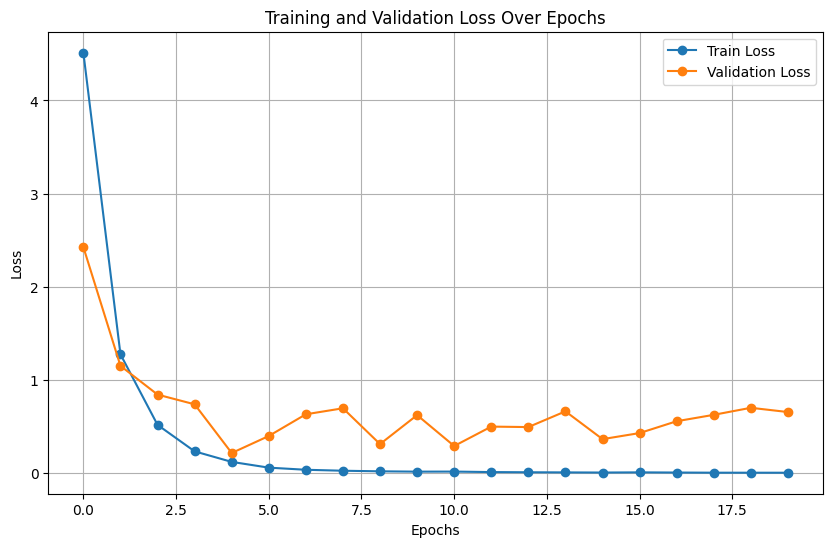

In [31]:
import matplotlib.pyplot as plt

# Plot the training curve
x_cor=[i for i in range(epochs)]
plt.figure(figsize=(10, 6))
plt.plot(x_cor, Train_loss, label='Train Loss', marker='o')
plt.plot(x_cor, Val_loss, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


# **Calculate Bleu and Rouge Scores**

In [34]:
model.load_state_dict(torch.load("best_transformer_model.pth"))
bleu_score, rouge_scores = evaluate_metrics(model, val_loader, combined_tokenizer, device)
print(f"BLEU Score: {bleu_score:.4f}")
print(f"ROUGE Scores: {rouge_scores}")

BLEU Score: 0.1070
ROUGE Scores: {'rouge-1': {'r': 0.0005087497292007796, 'p': 0.01312910284463895, 'f': 0.0009766836791209046}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.0005087497292007796, 'p': 0.01312910284463895, 'f': 0.0009766836791209046}}


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

def extract_attention_map(model, src_tensor, layer_idx=0, head_idx=0):
    attention_map = None

    # Hook function to extract attention weights
    def hook_fn(module, input, output):
        nonlocal attention_map
        Q, K = input[0], input[1]  # Query and Key tensors
        Q = Q.reshape(Q.shape[0], -1, module.num_heads, module.head_dim).permute(0, 2, 1, 3)
        K = K.reshape(K.shape[0], -1, module.num_heads, module.head_dim).permute(0, 2, 1, 3)
        energy = torch.matmul(Q, K.transpose(-1, -2)) / math.sqrt(module.head_dim)
        attention_map = torch.softmax(energy, dim=-1)

    # Register hook to the specified layer
    hook = model.encoder.layers[layer_idx].attention.register_forward_hook(hook_fn)

    # Perform a forward pass to trigger the hook
    with torch.no_grad():
        model.encoder(src_tensor)

    # Remove the hook after extraction
    hook.remove()

    # Return the attention map for the specified head
    return attention_map[:, head_idx]  # Shape: (batch_size, seq_len, seq_len)


In [36]:
def plot_attention(attention_weights, tokens, title="Attention Map"):
    attention_weights = attention_weights.squeeze(0).cpu().numpy()
    plt.figure(figsize=(10, 8))
    sns.heatmap(attention_weights, xticklabels=tokens, yticklabels=tokens, cmap="viridis")
    plt.title(title)
    plt.xlabel("Keys")
    plt.ylabel("Queries")
    plt.show()


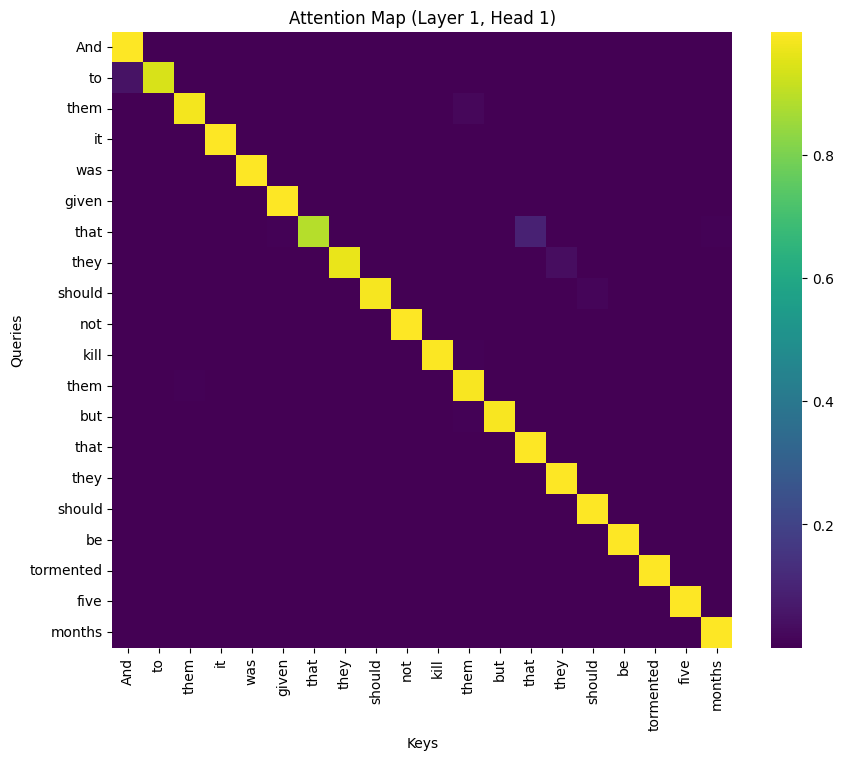

In [37]:
src_sentence = "And to them it was given that they should not kill them but that they should be tormented five months."

# Tokenize input sentence using your custom tokenizer
cleaned_sentence = clean_text(src_sentence)  # Clean the input
src_tokens = combined_tokenizer.encode(cleaned_sentence).tokens  # Tokenize using the trained tokenizer
src_indices = combined_tokenizer.encode(cleaned_sentence).ids  # Convert tokens to IDs
src_tensor = torch.tensor([src_indices])  # Shape: (1, seq_len)
model.to('cpu')
# Extract attention weights
layer_idx = 0  # Encoder layer index
head_idx = 0   # Attention head index
attention_weights = extract_attention_map(model, src_tensor, layer_idx, head_idx)  # Replace None with your model

# Plot attention map
plot_attention(attention_weights, src_tokens, title=f"Attention Map (Layer {layer_idx + 1}, Head {head_idx + 1})")

# **LSTM Model Implementation**

# **Preprocessing and Tokenization**

In [38]:
import re
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tokenizers import Tokenizer, models, pre_tokenizers, trainers
from tqdm import tqdm
from nltk.translate.bleu_score import corpus_bleu
from rouge import Rouge

def clean_text(text):
    text = re.sub(r"[^\u0600-\u06FFa-zA-Z\s]", "", text)  # Retain only Urdu, English, and spaces
    text = re.sub(r"\s+", " ", text).strip()  # Normalize extra whitespace
    return text

def train_combined_tokenizer(file_paths, vocab_size=8000):
    tokenizer = Tokenizer(models.BPE())
    tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()
    trainer = trainers.BpeTrainer(
        vocab_size=vocab_size,
        special_tokens=["<pad>", "<s>", "</s>", "<unk>"]
    )
    tokenizer.train(files=file_paths, trainer=trainer)
    return tokenizer


# **Custom Dataset Class**

In [39]:
class TextDataset(Dataset):
    def __init__(self, file_paths, tokenizer, max_seq_length):
        self.tokenizer = tokenizer
        self.max_seq_length = max_seq_length
        self.data = self._load_and_process(file_paths)

    def _load_and_process(self, file_paths):
        """
        Loads and processes multiple text files, concatenating them together.
        """
        all_lines = []
        for file_path in file_paths:
            with open(file_path, 'r', encoding='utf-8') as file:
                lines = file.readlines()
            cleaned_lines = [clean_text(line) for line in lines]
            all_lines.extend(cleaned_lines)

        # Tokenize all lines
        tokenized_lines = [self.tokenizer.encode(line).ids for line in all_lines]
        padded_lines = self._pad_sequences(tokenized_lines)
        return padded_lines

    def _pad_sequences(self, sequences):
        return [
            seq[:self.max_seq_length] + [0] * (self.max_seq_length - len(seq))
            if len(seq) < self.max_seq_length else seq[:self.max_seq_length]
            for seq in sequences
        ]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sequence = self.data[idx]
        input_seq = torch.tensor(sequence[:-1], dtype=torch.long)  # All tokens except last
        target_seq = torch.tensor(sequence[1:], dtype=torch.long)  # All tokens except first
        return input_seq, target_seq

# **LSTM Model**

In [40]:
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)
        self.dropout = nn.Dropout(0.3)  # Increased dropout for more regularization

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        x = self.dropout(x)
        x = self.fc(x)
        return x

# **Custom Training Function**

In [41]:
def train_model(model, dataloader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for inputs, targets in tqdm(dataloader, desc="Training"):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.view(-1, outputs.size(-1)), targets.view(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

# **Custom Evaluation Function**

In [42]:
def evaluate_model(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for inputs, targets in tqdm(dataloader, desc="Evaluating"):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs.view(-1, outputs.size(-1)), targets.view(-1))
            total_loss += loss.item()
    return total_loss / len(dataloader)

# **Bleu and Rouge Score Calculation**

In [43]:
def evaluate_bleu_and_rouge(references, hypotheses):
    bleu_score = corpus_bleu(references, hypotheses)
    rouge = Rouge()
    rouge_scores = rouge.get_scores(hypotheses, references, avg=True)

    # print(f"BLEU Score: {bleu_score:.4f}")
    # print(f"ROUGE Scores: {rouge_scores}")
    return bleu_score

# **Define File Paths**

In [44]:
    # File paths for all datasets
    train_files = [
        "/kaggle/input/question_1_dataset/pytorch/default/1/bible_train.en", "/kaggle/input/question_1_dataset/pytorch/default/1/bible_train.ur",
        "/kaggle/input/question_1_dataset/pytorch/default/1/bible_dev.en", "/kaggle/input/question_1_dataset/pytorch/default/1/bible_dev.ur",
        "/kaggle/input/question_1_dataset/pytorch/default/1/quran_train.en", "/kaggle/input/question_1_dataset/pytorch/default/1/quran_train.ur",
        "/kaggle/input/question_1_dataset/pytorch/default/1/quran_dev.en", "/kaggle/input/question_1_dataset/pytorch/default/1/quran_dev.ur"
    ]
    test_files = [
        "/kaggle/input/question_1_dataset/pytorch/default/1/bible_test.en", "/kaggle/input/question_1_dataset/pytorch/default/1/bible_test.ur",
        "/kaggle/input/question_1_dataset/pytorch/default/1/quran_test.en", "/kaggle/input/question_1_dataset/pytorch/default/1/quran_test.ur"
    ]

# **Define Hyperparameters**

In [45]:
# Hyperparameters
vocab_size = 8000
max_seq_length = 50
embedding_dim = 128
hidden_dim = 512  # Increased hidden dimension
num_layers = 3    # More layers
batch_size = 64
num_epochs = 10
learning_rate = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



# Train the Tokenizer

In [46]:
tokenizer = train_combined_tokenizer(train_files + test_files, vocab_size=vocab_size)

# **Training and Testing Datasets**

In [47]:
train_dataset = TextDataset(train_files, tokenizer, max_seq_length)
test_dataset = TextDataset(test_files, tokenizer, max_seq_length)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# **Initialize the Model, Loss Function, Optimizer**

In [48]:
# Initialize model, loss, and optimizer
model = LSTMModel(vocab_size, embedding_dim, hidden_dim, num_layers).to(device)
criterion = nn.CrossEntropyLoss(ignore_index=0)  # Ignore padding token
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [49]:
Train_loss=[]
Val_loss=[]
Bleu_score=[]
for epoch in range(num_epochs):
    print(f"\nEpoch {epoch + 1}/{num_epochs}")
    train_loss = train_model(model, train_loader, criterion, optimizer, device)
    val_loss = evaluate_model(model, test_loader, criterion, device)
    Train_loss.append(train_loss)
    Val_loss.append(val_loss)
    print(f"Train Loss: {train_loss:.4f} | Validation Loss: {val_loss:.4f}")

    # BLEU and ROUGE evaluation (on a small subset for speed)
    predictions = []  # Collect predicted sentences
    targets = []  # Collect true sentences
    for inputs, targets_batch in tqdm(test_loader, desc="Evaluating BLEU/ROUGE"):
        inputs, targets_batch = inputs.to(device), targets_batch.to(device)
        outputs = model(inputs)
        predicted_ids = outputs.argmax(dim=-1)
        # Decode predictions and targets by converting the tensor to a list first
        predictions.extend([tokenizer.decode(ids.tolist()) for ids in predicted_ids])
        targets.extend([tokenizer.decode(ids.tolist()) for ids in targets_batch])

    
    # Evaluate BLEU and ROUGE
    Bleu_score.append(evaluate_bleu_and_rouge(targets, predictions))

# Save the model
torch.save(model.state_dict(), "lstm_language_model.pth")
print("Model training completed and saved!")


Epoch 1/10


Evaluating: 100%|██████████| 15/15 [00:00<00:00, 68.36it/s]


Train Loss: 6.9759 | Validation Loss: 6.5183


Evaluating BLEU/ROUGE: 100%|██████████| 15/15 [00:00<00:00, 55.94it/s]



Epoch 2/10


Evaluating: 100%|██████████| 15/15 [00:00<00:00, 68.84it/s]


Train Loss: 5.8421 | Validation Loss: 5.6966


Evaluating BLEU/ROUGE: 100%|██████████| 15/15 [00:00<00:00, 56.85it/s]



Epoch 3/10


Evaluating: 100%|██████████| 15/15 [00:00<00:00, 67.18it/s]


Train Loss: 5.2644 | Validation Loss: 5.4072


Evaluating BLEU/ROUGE: 100%|██████████| 15/15 [00:00<00:00, 56.75it/s]



Epoch 4/10


Evaluating: 100%|██████████| 15/15 [00:00<00:00, 67.85it/s]


Train Loss: 4.9183 | Validation Loss: 5.2633


Evaluating BLEU/ROUGE: 100%|██████████| 15/15 [00:00<00:00, 56.82it/s]



Epoch 5/10


Evaluating: 100%|██████████| 15/15 [00:00<00:00, 68.23it/s]


Train Loss: 4.6542 | Validation Loss: 5.1741


Evaluating BLEU/ROUGE: 100%|██████████| 15/15 [00:00<00:00, 56.04it/s]



Epoch 6/10


Evaluating: 100%|██████████| 15/15 [00:00<00:00, 66.36it/s]


Train Loss: 4.4369 | Validation Loss: 5.1348


Evaluating BLEU/ROUGE: 100%|██████████| 15/15 [00:00<00:00, 54.54it/s]



Epoch 7/10


Evaluating: 100%|██████████| 15/15 [00:00<00:00, 66.88it/s]


Train Loss: 4.2461 | Validation Loss: 5.1303


Evaluating BLEU/ROUGE: 100%|██████████| 15/15 [00:00<00:00, 55.40it/s]



Epoch 8/10


Evaluating: 100%|██████████| 15/15 [00:00<00:00, 68.02it/s]


Train Loss: 4.0704 | Validation Loss: 5.1336


Evaluating BLEU/ROUGE: 100%|██████████| 15/15 [00:00<00:00, 54.21it/s]



Epoch 9/10


Evaluating: 100%|██████████| 15/15 [00:00<00:00, 65.62it/s]


Train Loss: 3.9072 | Validation Loss: 5.1930


Evaluating BLEU/ROUGE: 100%|██████████| 15/15 [00:00<00:00, 54.98it/s]



Epoch 10/10


Evaluating: 100%|██████████| 15/15 [00:00<00:00, 65.98it/s]


Train Loss: 3.7542 | Validation Loss: 5.2432


Evaluating BLEU/ROUGE: 100%|██████████| 15/15 [00:00<00:00, 54.10it/s]


Model training completed and saved!


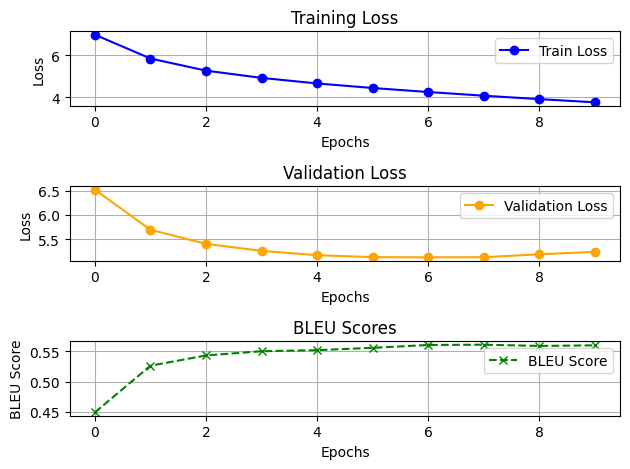

In [50]:
import matplotlib.pyplot as plt

# Training Loss
epochs=[i for i in range(10)]
plt.subplot(3, 1, 1)
plt.plot(epochs, Train_loss, label='Train Loss', marker='o', color='blue')
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

# Validation Loss
plt.subplot(3, 1, 2)
plt.plot(epochs, Val_loss, label='Validation Loss', marker='o', color='orange')
plt.title("Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

# BLEU Scores
plt.subplot(3, 1, 3)
plt.plot(epochs, Bleu_score, label='BLEU Score', marker='x', linestyle='--', color='green')
plt.title("BLEU Scores")
plt.xlabel("Epochs")
plt.ylabel("BLEU Score")
plt.grid(True)
plt.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()
